In [11]:
import torch
#from torch import autocast // only for GPU

from PIL import Image
import numpy as np
from io import BytesIO
import os

import cv2
import torch
import urllib.request

import matplotlib.pyplot as plt
from PIL import Image

MY_SECRET_TOKEN=os.environ.get('HF_TOKEN_SD')

In [2]:
from diffusers import StableDiffusionImg2ImgPipeline

YOUR_TOKEN=MY_SECRET_TOKEN


In [3]:
device="cuda"

In [4]:
stable_diff_pipe = StableDiffusionImg2ImgPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", use_auth_token=YOUR_TOKEN)
stable_diff_pipe.to(device)
stable_diff_pipe.enable_attention_slicing()

Fetching 15 files: 100%|███████████████████████████████████████████████████████████████████████| 15/15 [00:00<?, ?it/s]
C:\Users\User\anaconda3\envs\stable_diff\lib\site-packages\transformers\models\clip\feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


StableDiffusionImg2ImgPipeline {
  "_class_name": "StableDiffusionImg2ImgPipeline",
  "_diffusers_version": "0.13.1",
  "feature_extractor": [
    "transformers",
    "CLIPFeatureExtractor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [2]:
def resize(value,img):
  img = img.resize((value,value), Image.Resampling.LANCZOS)
  return img


def prepare_from_path(img_path):
    img = Image.open(img_path)
    img = resize(512, img)
    return img

In [14]:
source_img = prepare_from_path("C:/Users/User/Documents/Data_Science/ar_stable_diffusion/data/sample.jpeg")

In [16]:
prompt = "futuristic star wars style room"

In [11]:
guidance_scale = 12
strength=0.75
num_inference_steps=25

def infer(source_img, prompt, guidance_scale = guidance_scale, strength=strength, num_inference_steps=num_inference_steps): 
    generator = torch.Generator('cpu').manual_seed(0)
    
    source_image = resize(512, source_img)
    source_image.save('source.png')
    
    images_list = img_pipe([prompt] * 1, init_image=source_image, strength=strength, guidance_scale=guidance_scale, num_inference_steps=num_inference_steps)
 
    return images_list

In [17]:
results = infer(source_img, prompt)

C:\Users\User\anaconda3\envs\stable_diff\lib\site-packages\diffusers\pipelines\stable_diffusion\pipeline_stable_diffusion_img2img.py:643: FutureWarning: The `init_image` argument is deprecated and will be removed in version 0.14.0. Please use `image` instead of `init_image`.
  init_image = deprecate("init_image", "0.14.0", message, take_from=kwargs)
100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [02:48<00:00, 24.10s/it]


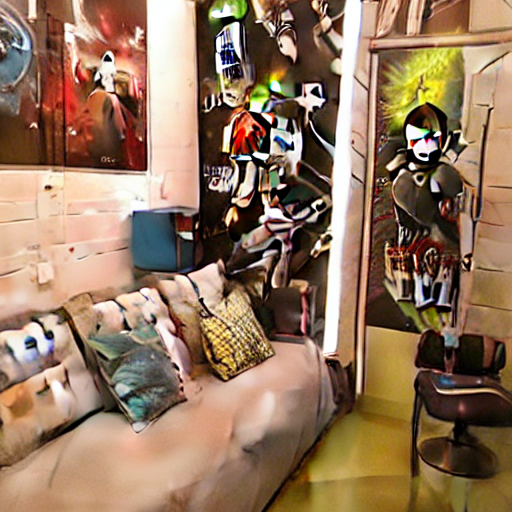

In [27]:
results.images[0]

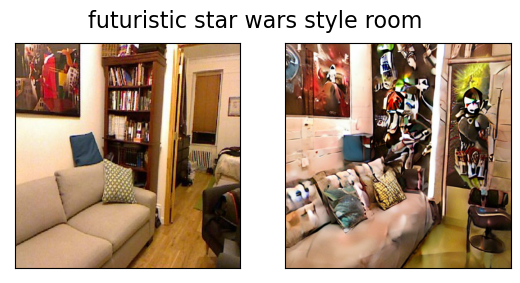

In [37]:
        fig,ax = plt.subplots(1,2)
        ax[0].imshow(source_img)
        ax[1].imshow(results.images[0])
        fig.suptitle(prompt, fontsize=16,  y=0.8)
        for a in ax:
            a.set_xticks([])
            a.set_yticks([])

In [7]:
import matplotlib.pyplot as plt

In [15]:
images_path = "C:/Users/User/Documents/Data_Science/ar_stable_diffusion/data/"
image_files = ["sample.jpeg", "image.jpg" ]

prompt_list = ["old purple victorian room", "bright white scientific laboratory", "medieval dungeon", "greenhouse full of plants"]
guidance_scale = 12
strength=0.75
num_inference_steps=25

results_path = "C:/Users/User/Documents/Data_Science/ar_stable_diffusion/results/"

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [04:40<00:00, 15.59s/it]


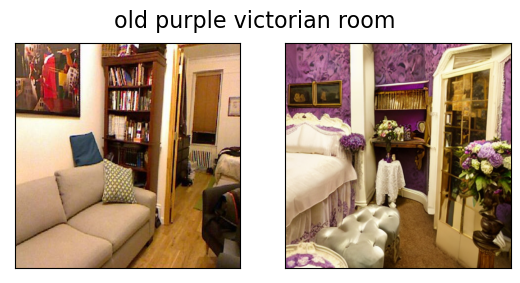

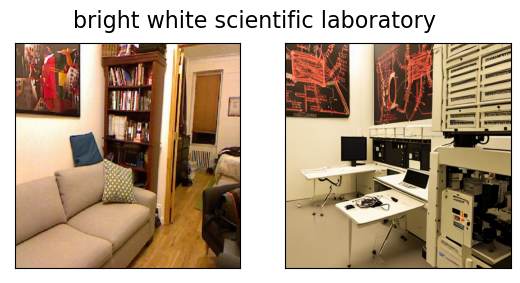

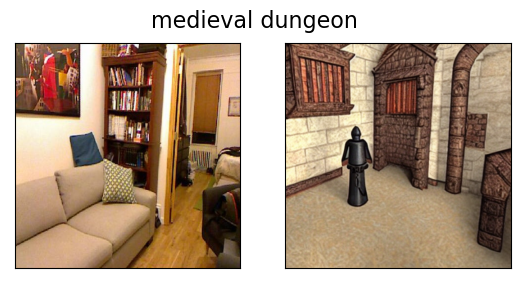

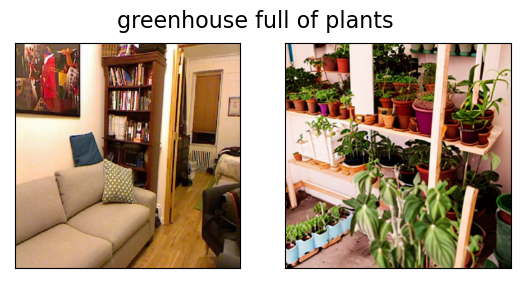

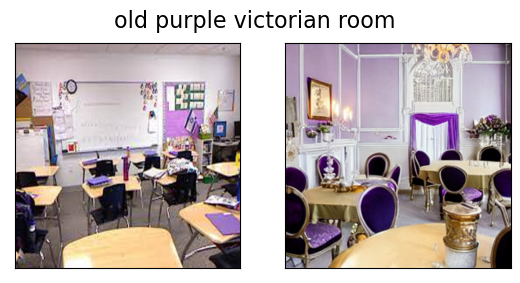

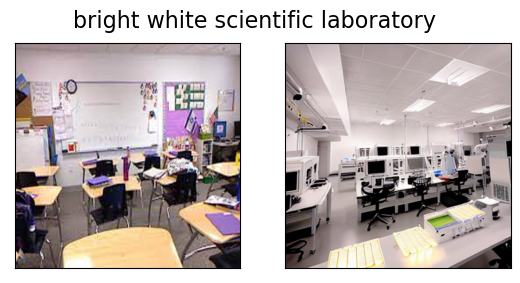

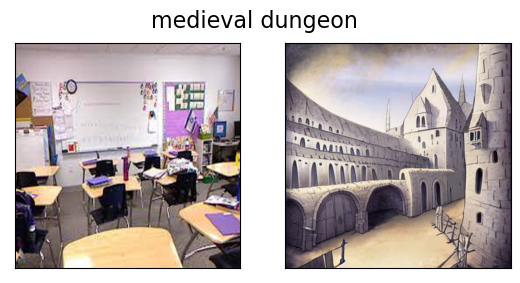

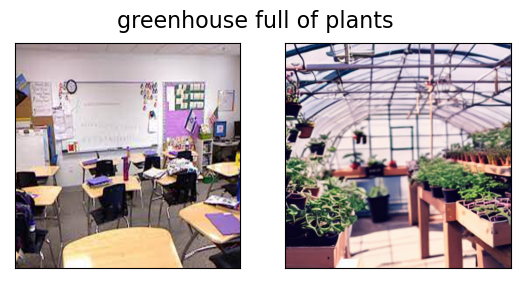

In [18]:
for file in image_files:
    for prompt in prompt_list:
        
        source_img = prepare_from_path(images_path + file)
        results = infer(source_img, prompt, guidance_scale, strength, num_inference_steps)
        
        fig,ax = plt.subplots(1,2)
        ax[0].imshow(source_img)
        ax[1].imshow(results.images[0])
        fig.suptitle(prompt, fontsize=16,  y=0.8)
        for a in ax:
            a.set_xticks([])
            a.set_yticks([])
            
        results.images[0].save( results_path + "output/" + prompt + "_" + file.split(".", 1)[0] + ".png")
        fig.savefig( results_path + "comparison/"  + "comparison_" + prompt + "_" + file.split(".", 1)[0] + ".png")
        

In [17]:
results.images[0].save("C:/Users/User/Documents/Data_Science/ar_stable_diffusion/data/test.png")

# Monocular Depth Estimation

In [1]:
#from huggingface_hub import from_pretrained_keras

#model = from_pretrained_keras("keras-io/monocular-depth-estimation")

C:\Users\User\anaconda3\envs\stable_diff\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
config.json not found in HuggingFace Hub
Fetching 11 files:   9%|█████▊                                                          | 1/11 [00:00<00:05,  1.99it/s]
















































Fetching 11 files: 100%|███████████████████████████████████████████████████████████████| 11/11 [00:43<00:00,  4.00s/it]


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [3]:
model_type = "DPT_Large"
midas = torch.hub.load("intel-isl/MiDaS", model_type)

Using cache found in C:\Users\User/.cache\torch\hub\intel-isl_MiDaS_master


In [4]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()

DPTDepthModel(
  (pretrained): Module(
    (model): VisionTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
        (norm): Identity()
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (norm_pre): Identity()
      (blocks): Sequential(
        (0): Block(
          (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (attn): Attention(
            (qkv): Linear(in_features=1024, out_features=3072, bias=True)
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=1024, out_features=1024, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (ls1): Identity()
          (drop_path1): Identity()
          (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_features=1024, out_features=4096, bias=True)
            (act): GELU()
            (drop1): Dropout(p=0

In [5]:
device

device(type='cuda')

In [6]:
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform

Using cache found in C:\Users\User/.cache\torch\hub\intel-isl_MiDaS_master


In [7]:
images_path = "C:/Users/User/Documents/Data_Science/ar_stable_diffusion/data/"
image_files = ["sample.jpeg", "image.jpg" ]

results_path = "C:/Users/User/Documents/Data_Science/ar_stable_diffusion/results/"

Inference completed for image: sample
Inference completed for image: image


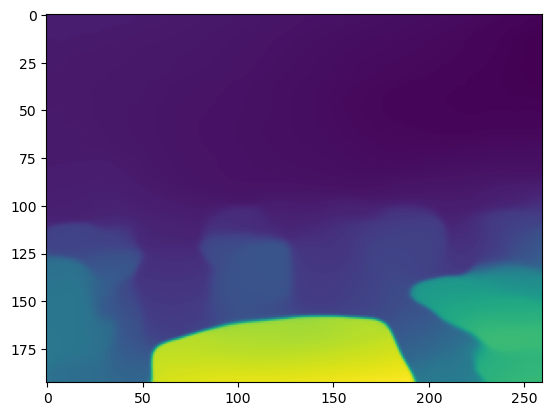

In [13]:

for file in image_files:

    img = cv2.imread((images_path + file))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    input_batch = transform(img).to(device)

    with torch.no_grad():
        prediction = midas(input_batch)
        print("Inference completed for image: " + file.split(".", 1)[0])

        prediction = torch.nn.functional.interpolate(
            prediction.unsqueeze(1),
            size=img.shape[:2],
            mode="bicubic",
            align_corners=False,
        ).squeeze()

    output = prediction.cpu().numpy()
    plt.imshow(output)
    im = Image.fromarray(output).convert('RGB')
    im.save( results_path + "depth_maps/" + "depth_" + file.split(".", 1)[0] + ".png")


In [9]:
output

array([[19.969202 , 19.928514 , 19.911718 , ...,  2.3730285,  2.3891745,
         2.3979113],
       [19.976109 , 20.00144  , 19.95711  , ...,  2.409195 ,  2.3769355,
         2.3627093],
       [19.994234 , 20.008928 , 19.880781 , ...,  2.406749 ,  2.3968344,
         2.3710723],
       ...,
       [30.614952 , 30.691399 , 30.64373  , ..., 33.41332  , 33.403893 ,
        33.450058 ],
       [30.75923  , 30.741838 , 30.76857  , ..., 33.43525  , 33.36614  ,
        33.45999  ],
       [30.78457  , 30.799826 , 30.82107  , ..., 33.479305 , 33.50173  ,
        33.447308 ]], dtype=float32)

In [14]:
gen_images_path = "C:/Users/User/Documents/Data_Science/ar_stable_diffusion/results/output/"

gen_depth_results_path = "C:/Users/User/Documents/Data_Science/ar_stable_diffusion/results/generated_image_depth_maps/"

Inference completed for image: C:/Users/User/Documents/Data_Science/ar_stable_diffusion/results/output/bright white scientific laboratory_image
Inference completed for image: C:/Users/User/Documents/Data_Science/ar_stable_diffusion/results/output/bright white scientific laboratory_sample
Inference completed for image: C:/Users/User/Documents/Data_Science/ar_stable_diffusion/results/output/greenhouse full of plants_image
Inference completed for image: C:/Users/User/Documents/Data_Science/ar_stable_diffusion/results/output/greenhouse full of plants_sample
Inference completed for image: C:/Users/User/Documents/Data_Science/ar_stable_diffusion/results/output/medieval dungeon_image
Inference completed for image: C:/Users/User/Documents/Data_Science/ar_stable_diffusion/results/output/medieval dungeon_sample
Inference completed for image: C:/Users/User/Documents/Data_Science/ar_stable_diffusion/results/output/old purple victorian room_image
Inference completed for image: C:/Users/User/Documen

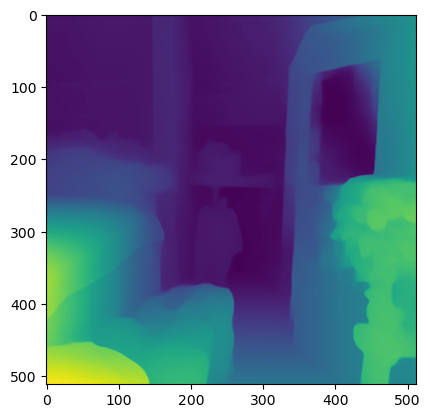

In [22]:
# Iterate directory
for path in os.listdir(gen_images_path):
    
    image_path = os.path.join(gen_images_path, path)

    if os.path.isfile(image_path):

        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        input_batch = transform(img).to(device)

        with torch.no_grad():
            prediction = midas(input_batch)
            print("Inference completed for image: " + image_path.split(".", 1)[0])

            prediction = torch.nn.functional.interpolate(
                prediction.unsqueeze(1),
                size=img.shape[:2],
                mode="bicubic",
                align_corners=False,
            ).squeeze()

        output = prediction.cpu().numpy()
        plt.imshow(output)
        im = Image.fromarray(output).convert('RGB')
        im.save( gen_depth_results_path + "depth_" + image_path.split("/")[-1].split(".", 1)[0] + ".png")

'bright white scientific laboratory_image.png'

# Image Generation with Image + Depth Map Prior

Using the following pretrained model:
https://huggingface.co/stabilityai/stable-diffusion-2-depth

Combines Stable Diffusion v2 with MiDaS

In [3]:
import torch
import requests
from PIL import Image
from diffusers import StableDiffusionDepth2ImgPipeline

In [6]:
device =   torch.device("cpu")

In [7]:
conditioned_pipe = StableDiffusionDepth2ImgPipeline.from_pretrained(
   "stabilityai/stable-diffusion-2-depth",
).to(device)

Fetching 15 files: 100%|████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 15001.09it/s]


In [17]:
device

device(type='cuda')

In [8]:
guidance_scale = 12
strength=0.75
num_inference_steps=25

def infer_with_depth(source_img, prompt, guidance_scale = guidance_scale, strength=strength, num_inference_steps=num_inference_steps): 
    
    source_image = resize(512, source_img)
    source_image.save('source.png')
    
    images_list = conditioned_pipe(prompt=prompt, image=source_image, strength=strength, guidance_scale=guidance_scale, num_inference_steps=num_inference_steps)
 
    return images_list

In [9]:
images_path = "C:/Users/User/Documents/Data_Science/ar_stable_diffusion/data/"
image_files = ["sample.jpeg", "image.jpg" ]

prompt_list = ["old purple victorian room", "bright white scientific laboratory", "medieval dungeon", "greenhouse full of plants"]
guidance_scale = 12
strength=0.75
num_inference_steps=25

results_path = "C:/Users/User/Documents/Data_Science/ar_stable_diffusion/results/"

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [05:50<00:00, 19.47s/it]


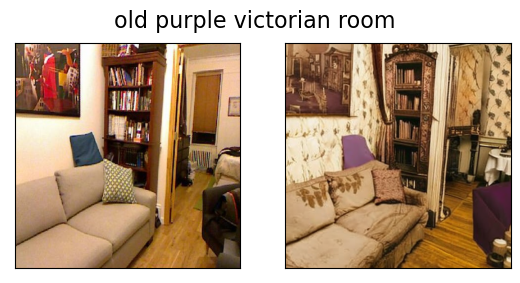

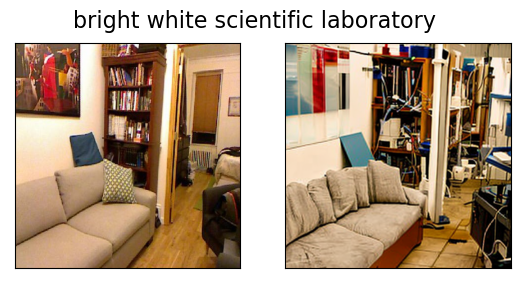

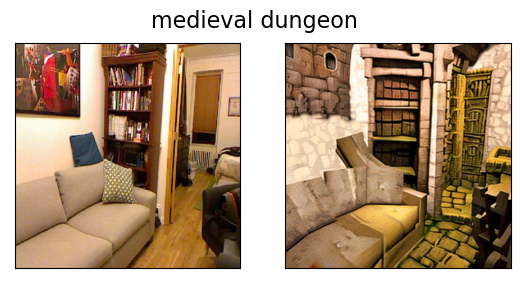

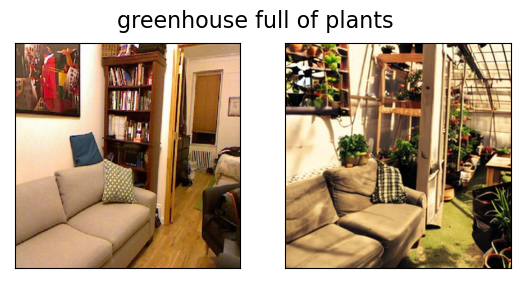

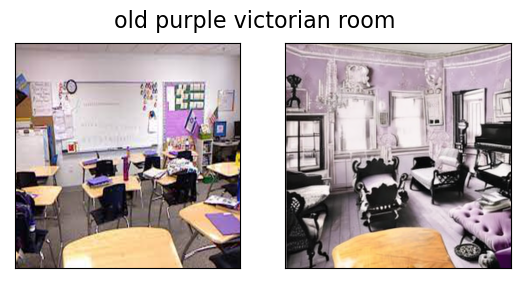

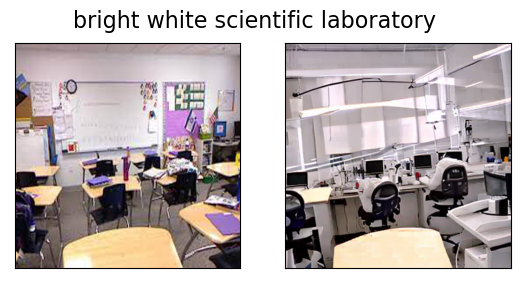

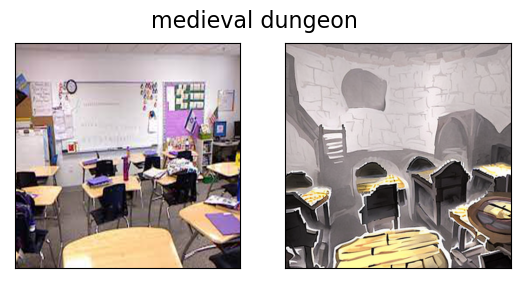

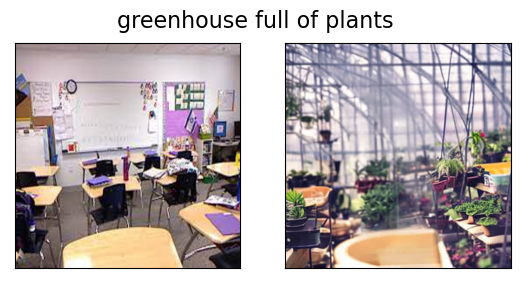

In [12]:
for file in image_files:
    for prompt in prompt_list:
        
        source_img = prepare_from_path(images_path + file)
        results = infer_with_depth(source_img, prompt, guidance_scale, strength, num_inference_steps)
        
        fig,ax = plt.subplots(1,2)
        ax[0].imshow(source_img)
        ax[1].imshow(results.images[0])
        fig.suptitle(prompt, fontsize=16,  y=0.8)
        for a in ax:
            a.set_xticks([])
            a.set_yticks([])
            
        results.images[0].save( results_path + "depth_conditioned_output/" + prompt + "_" + file.split(".", 1)[0] + ".png")
        fig.savefig( results_path + "depth_conditioned_comparison/"  + "depth_conditioned_comparison_" + prompt + "_" + file.split(".", 1)[0] + ".png")